In [105]:
import pandas as pd
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('churn.csv')

In [77]:
df.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [79]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [80]:
df.head().T

,0,1,2,3,4
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1
HasCrCard,1,0,1,0,1
IsActiveMember,1,1,0,0,1
EstimatedSalary,101348.88,112542.58,113931.57,93826.63,79084.1


/var/folders/zz/9yhsg1094_32rjdjwt0gvmpm0000gn/T/ipykernel_15909/3242103035.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

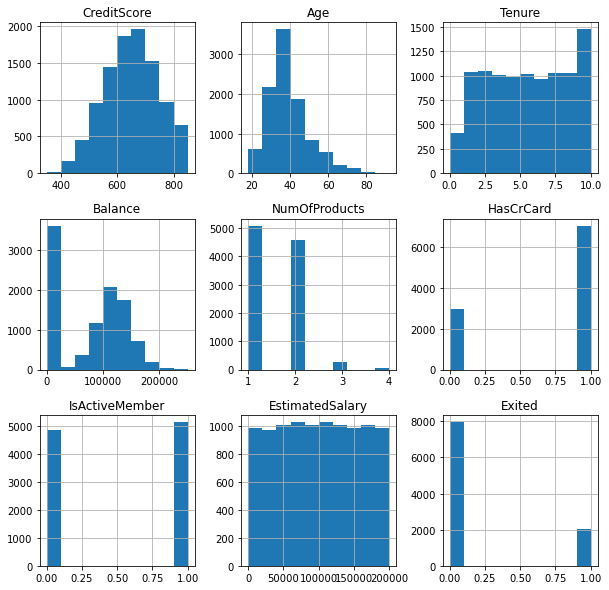

In [81]:
ax = plt.figure(figsize=(10,10))
df.hist(ax=ax)

In [82]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [83]:
df.duplicated().sum()

0

In [84]:
df.Gender.value_counts()/len(df)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

In [129]:
df.Geography.value_counts()/len(df)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [172]:
df.Exited.value_counts()/len(df)

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

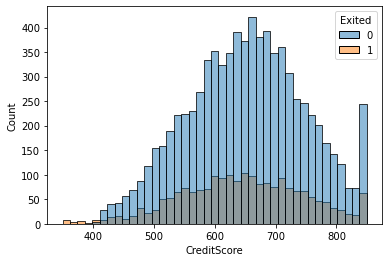

In [87]:
sns.histplot(x='CreditScore', hue='Exited', data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

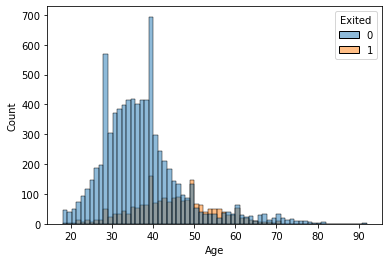

In [88]:
sns.histplot(x='Age', hue='Exited', data=df)

<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

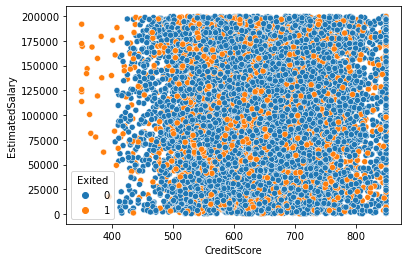

In [89]:
sns.scatterplot(x='CreditScore', y='EstimatedSalary', hue='Exited', data=df)

<AxesSubplot:>

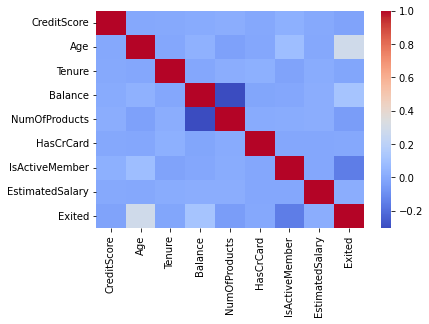

In [90]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [102]:
X = pd.get_dummies(df.iloc[:,0:10], columns=['Geography','Gender'], drop_first=True)

In [103]:
y = df['Exited']

In [124]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, stratify=y, random_state=33)

In [125]:
y_train.mean(), y_test.mean()

(0.20375, 0.2035)

In [126]:
X_train.Gender_Male.value_counts()/len(X_train)

1    0.548
0    0.452
Name: Gender_Male, dtype: float64

In [127]:
X_train.Geography_Germany.value_counts()/len(X_train)

0    0.748875
1    0.251125
Name: Geography_Germany, dtype: float64

In [128]:
X_train.Geography_Spain.value_counts()/len(X_train)

0    0.753375
1    0.246625
Name: Geography_Spain, dtype: float64

In [130]:
X_test.Gender_Male.value_counts()/len(X_test)

1    0.5365
0    0.4635
Name: Gender_Male, dtype: float64

In [131]:
X_test.Geography_Germany.value_counts()/len(X_test)

0    0.75
1    0.25
Name: Geography_Germany, dtype: float64

In [132]:
X_test.Geography_Spain.value_counts()/len(X_test)

0    0.748
1    0.252
Name: Geography_Spain, dtype: float64

In [133]:
### The split of categorical variables is roughly the same in the training and testing sets. 

In [160]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,8000.0,650.135250,97.027295,350.00,583.0000,651.000,717.0000,850.00
Age,8000.0,38.959750,10.534444,18.00,32.0000,37.000,44.0000,92.00
Tenure,8000.0,5.025250,2.894246,0.00,3.0000,5.000,8.0000,10.00
Balance,8000.0,76640.554455,62259.984755,0.00,0.0000,96986.030,127639.3725,250898.09
NumOfProducts,8000.0,1.528000,0.581815,1.00,1.0000,1.000,2.0000,4.00
EstimatedSalary,8000.0,100291.492777,57495.798529,11.58,51355.3425,100463.065,149481.9025,199953.33
Geography_Germany,8000.0,0.251125,0.433687,0.00,0.0000,0.000,1.0000,1.00
Geography_Spain,8000.0,0.246625,0.431073,0.00,0.0000,0.000,0.0000,1.00
Gender_Male,8000.0,0.548000,0.497722,0.00,0.0000,1.000,1.0000,1.00
HasCrCard_1,8000.0,0.704375,0.456352,0.00,0.0000,1.000,1.0000,1.00


In [161]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Geography_Germany,10000.0,0.250900,0.433553,0.00,0.00,0.000,1.0000,1.00
Geography_Spain,10000.0,0.247700,0.431698,0.00,0.00,0.000,0.0000,1.00
Gender_Male,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
HasCrCard_1,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00


In [166]:
df.CreditScore.sort_values(ascending=False)[0:1000]

792     850
4083    850
4158    850
4157    850
7413    850
       ... 
1439    778
5710    778
2589    778
3579    778
7075    778
Name: CreditScore, Length: 1000, dtype: int64

In [175]:
print(df[df['Exited']==1]['CreditScore'].value_counts()/df.Exited.value_counts()[1])
print(df[df['Exited']==0]['CreditScore'].value_counts()/df.Exited.value_counts()[0])

850    0.021109
651    0.008346
705    0.007855
637    0.006873
727    0.006382
         ...   
821    0.000491
733    0.000491
804    0.000491
407    0.000491
486    0.000491
Name: CreditScore, Length: 420, dtype: float64
850    0.023860
678    0.006279
655    0.005400
684    0.005400
670    0.005274
         ...   
440    0.000126
839    0.000126
436    0.000126
405    0.000126
419    0.000126
Name: CreditScore, Length: 442, dtype: float64


In [174]:
df.Exited.value_counts()[0]

7963

In [1]:
#try

In [ ]:
#tryyy